In [220]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', -1)

In [7]:
default = pd.read_csv('defualt server', sep =',')

In [244]:
default = default.drop_duplicates()

In [614]:
new = pd.read_csv('new server', sep =',')

In [622]:
new.shape

(246, 9)

In [621]:
new_update = pd.read_csv('new server update', sep =',')

In [623]:
new_update.shape

(396, 9)

In [22]:
new.dataset.unique()

array(['user_10_item_1_exp'], dtype=object)

In [29]:
default = default[['model','hyper','metric','value']]

In [28]:
new = new[['model','hyper','metric','value']]

In [33]:
default.model.unique()

array(['CollectiveMF_Item', 'CollectiveMF_User', 'CollectiveMF_No',
       'CollectiveMF_Both', 'surprise_SVD', 'surprise_Baseline'],
      dtype=object)

In [66]:
#function to extract nested info
def split_params(df):
    join_table = df.copy()
    join_table["list_hyper"] = join_table["hyper"].apply(eval)
    join_table = join_table.explode("list_hyper")
    join_table["params_name"], join_table["params_val"] = zip(*join_table["list_hyper"])

    return join_table


### Default server

In [245]:
default_split = split_params(default)[['model','metric','value','params_name','params_val']]

In [246]:
default_split.model.unique().tolist()

['CollectiveMF_Item',
 'CollectiveMF_User',
 'CollectiveMF_No',
 'CollectiveMF_Both',
 'surprise_SVD',
 'surprise_Baseline']

In [247]:
models = default_split.model.unique().tolist()

In [544]:
CollectiveMF_Item_set = default_split[default_split['model'] == models[0]]
CollectiveMF_User_set = default_split[default_split['model'] == 'CollectiveMF_User']
CollectiveMF_No_set = default_split[default_split['model'] == models[2]]
CollectiveMF_Both_set = default_split[default_split['model'] == models[3]]
surprise_SVD_set = default_split[default_split['model'] == models[4]]
surprise_Baseline_set = default_split[default_split['model'] == models[5]]

## surprise_Baseline

In [ ]:
CollectiveMF_No_ndcg = CollectiveMF_No_set[CollectiveMF_No_set['metric'] == 'ndcg@10']
CollectiveMF_No_ndcg = CollectiveMF_No_ndcg.pivot(index= 'value', 
                                                      columns='params_name', 
                                                      values='params_val').reset_index(inplace = False)

In [ ]:
color = ['lightpink','skyblue','lightgreen']
marker = ['P', '^' ,'o']
reg_param = [0.0001, 0.001 , 0.01]
w_main = [0.5,0.8,1]
k = [4.,8.,16.]

## surprise_SVD

In [693]:
surprise_SVD_ndcg = surprise_SVD_set[surprise_SVD_set['metric'] == 'ndcg@10']
surprise_SVD_ndcg = surprise_SVD_ndcg.pivot(index= 'value', 
                                                      columns='params_name', 
                                                      values='params_val').reset_index(inplace = False)

In [694]:
surprise_SVD_ndcg.n_factors.unique()
surprise_SVD_ndcg.groupby('n_factors').nunique()

params_name,value,lr_all,n_factors,reg_all
n_factors,,,,
4.0,1,1,1,1
10.0,25,3,1,4
50.0,16,3,1,4
100.0,12,3,1,4
150.0,12,3,1,4


In [695]:
surprise_SVD_ndcg = surprise_SVD_ndcg.drop(index = [0,11,16,27,32,35,43, 54,52,44,56,58,60,62,63,64])

In [703]:
color = ['lightpink','skyblue','lightgreen', 'lightgrey']
marker = ['P', '^' ,'o','H']
markerfacecolor = ['red', 'blue', 'green','grey']
n_factors = [10,50,100,150]
reg_all = [0.01,0.05,0.1,0.5]
lr_all = [0.002,0.005,0.01]


In [706]:
surprise_SVD_ndcg.loc[(surprise_SVD_ndcg['reg_all'] == 10)&(surprise_SVD_ndcg['n_factors']== n_factors[0])]

params_name,value,lr_all,n_factors,reg_all


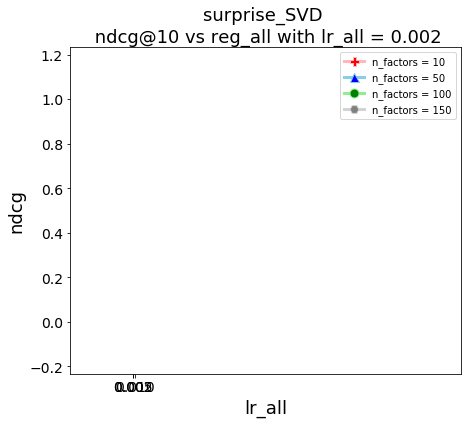

In [704]:
surprise_SVD_ndcg = surprise_SVD_ndcg.sort_values('lr_all')
fig, ax = plt.subplots(1,1, figsize = (7,6))
for i in range(4):
    labelstring = 'n_factors = '+ str(n_factors[i])
    ax.plot('lr_all', 'value', 
            data = surprise_SVD_ndcg.loc[(surprise_SVD_ndcg['n_factors'] == 10)&(surprise_SVD_ndcg['n_factors']== n_factors[i])],
            marker= marker[i], markerfacecolor=markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend()
ax.set_ylabel('ndcg',fontsize = 18)
ax.set_xlabel('lr_all',fontsize = 18)
ax.set_title('surprise_SVD \n ndcg@10 vs reg_all with lr_all = 0.002',fontsize = 18)
ax.set_xticks(lr_all)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)


In [ ]:
plt.savefig('ndcg_vs_lr_all_with_reg_all_0.01.eps', format='eps')

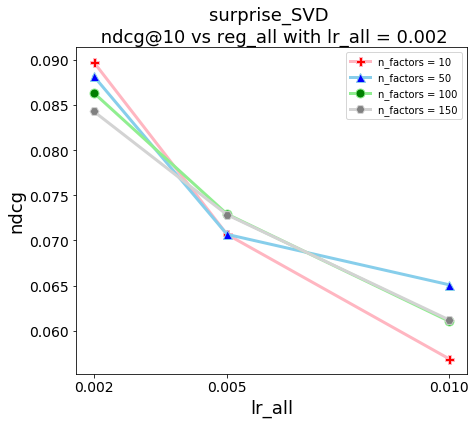

In [701]:
surprise_SVD_ndcg = surprise_SVD_ndcg.sort_values('lr_all')
fig, ax = plt.subplots(1,1, figsize = (7,6))
for i in range(4):
    labelstring = 'n_factors = '+ str(n_factors[i])
    ax.plot('lr_all', 'value', 
            data = surprise_SVD_ndcg.loc[(surprise_SVD_ndcg['reg_all'] == 0.01)&(surprise_SVD_ndcg['n_factors']== n_factors[i])],
            marker= marker[i], markerfacecolor=markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend()
ax.set_ylabel('ndcg',fontsize = 18)
ax.set_xlabel('lr_all',fontsize = 18)
ax.set_title('surprise_SVD \n ndcg@10 vs reg_all with lr_all = 0.002',fontsize = 18)
ax.set_xticks(lr_all)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)


In [ ]:
plt.savefig('ndcg_vs_lr_all_with_n_factors_0.01.eps', format='eps')

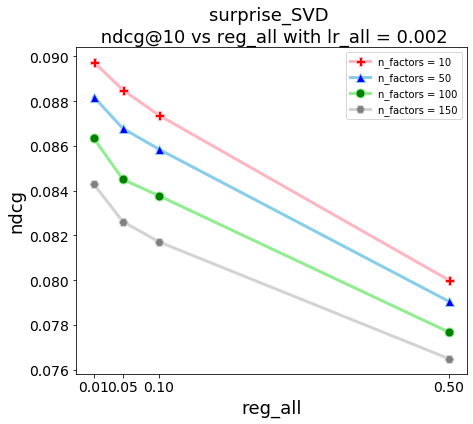

In [686]:
surprise_SVD_ndcg = surprise_SVD_ndcg.sort_values('reg_all')
fig, ax = plt.subplots(1,1, figsize = (7,6))
for i in range(4):
    labelstring = 'n_factors = '+ str(n_factors[i])
    ax.plot('reg_all', 'value', 
            data = surprise_SVD_ndcg.loc[(surprise_SVD_ndcg['lr_all'] == 0.002)&(surprise_SVD_ndcg['n_factors']== n_factors[i])],
            marker= marker[i], markerfacecolor=markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend()
ax.set_ylabel('ndcg',fontsize = 18)
ax.set_xlabel('reg_all',fontsize = 18)
ax.set_title('surprise_SVD \n ndcg@10 vs reg_all with lr_all = 0.002',fontsize = 18)
ax.set_xticks(reg_all)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)


In [ ]:
plt.savefig('ndcg_vs_reg_all_with_lr_all_0.002.eps', format='eps')

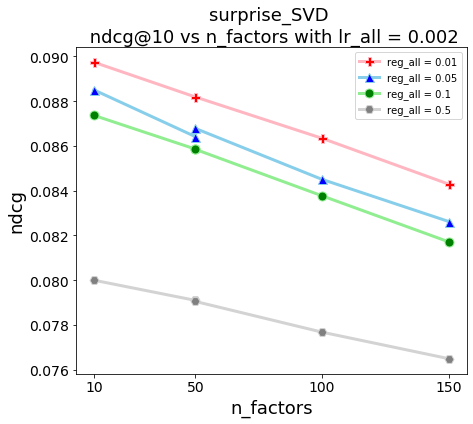

In [672]:
surprise_SVD_ndcg = surprise_SVD_ndcg.sort_values('n_factors')
fig, ax = plt.subplots(1,1, figsize = (7,6))
for i in range(4):
    labelstring = 'reg_all = '+ str(reg_all[i])
    ax.plot('n_factors', 'value', 
            data = surprise_SVD_ndcg.loc[(surprise_SVD_ndcg['lr_all'] == 0.002)&(surprise_SVD_ndcg['reg_all']== reg_all[i])],
            marker= marker[i], markerfacecolor=markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend()
ax.set_ylabel('ndcg',fontsize = 18)
ax.set_xlabel('n_factors',fontsize = 18)
ax.set_title('surprise_SVD \n ndcg@10 vs n_factors with lr_all = 0.002',fontsize = 18)
ax.set_xticks(n_factors)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)


In [ ]:
plt.savefig('ndcg_vs_n_factor_with_lr_all_0.002.eps', format='eps')

## CollectiveMF_No


In [576]:
CollectiveMF_No_ndcg = CollectiveMF_No_set[CollectiveMF_No_set['metric'] == 'ndcg@10']

In [577]:
CollectiveMF_No_ndcg = CollectiveMF_No_ndcg.pivot(index= 'value', 
                                                      columns='params_name', 
                                                      values='params_val').reset_index(inplace = False)

In [578]:
color = ['lightpink','skyblue','lightgreen']
marker = ['P', '^' ,'o']
reg_param = [0.0001, 0.001 , 0.01]
w_main = [0.5,0.8,1]
k = [4.,8.,16.]

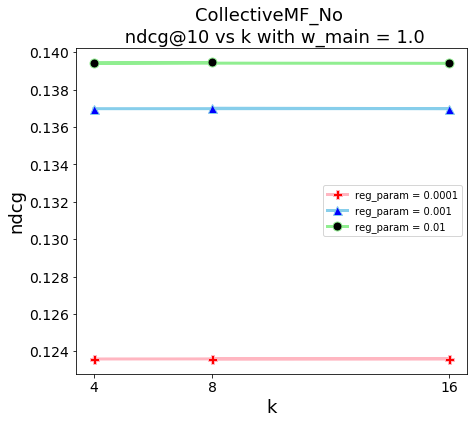

In [590]:
### Visualization of hyperparameters tuning
CollectiveMF_No_ndcg = CollectiveMF_No_ndcg.sort_values('reg_param')
fig, ax = plt.subplots(1,1, figsize = (7,6))
for i in range(3):
    labelstring = 'reg_param = '+ str(reg_param[i])
    ax.plot('k', 'value', 
            data = CollectiveMF_No_ndcg.loc[(CollectiveMF_No_ndcg['w_main'] == 1)&(CollectiveMF_No_ndcg['reg_param']== reg_param[i])],
            marker= marker[i], markerfacecolor=markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend()
ax.set_ylabel('ndcg',fontsize = 18)
ax.set_xlabel('k',fontsize = 18)
ax.set_title('CollectiveMF_No \n ndcg@10 vs k with w_main = 1.0',fontsize = 18)
ax.set_xticks(k)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)



In [591]:
plt.savefig('ndcg_vs_k_with_w_main_1.eps', format='eps')

<Figure size 432x288 with 0 Axes>

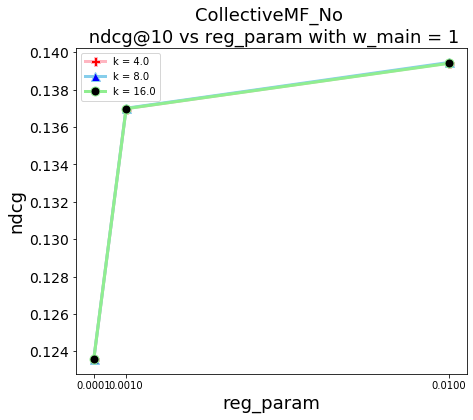

In [592]:
### Visualization of hyperparameters tuning

fig, ax = plt.subplots(1,1, figsize = (7,6))

for i in range(3):
    labelstring = 'k = '+ str(k[i])
    ax.plot('reg_param', 'value', 
            data = CollectiveMF_No_ndcg.loc[(CollectiveMF_No_ndcg['w_main'] == 1.0)&(CollectiveMF_No_ndcg['k']== k[i])],
            marker= marker[i], markerfacecolor= markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)

ax.legend()
ax.set_ylabel('ndcg',fontsize = 18)
ax.set_xlabel('reg_param',fontsize = 18)
ax.set_title('CollectiveMF_No \n ndcg@10 vs reg_param with w_main = 1',fontsize = 18)
ax.set_xticks(reg_param)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=14)


In [593]:
plt.savefig('ndcg_vs_reg_param_with_w_main_1.eps', format='eps')

<Figure size 432x288 with 0 Axes>

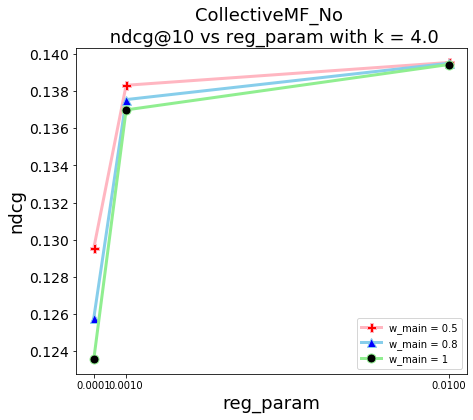

In [594]:
### Visualization of hyperparameters tuning

fig, ax = plt.subplots(1,1, figsize = (7,6))

for i in range(3):
    labelstring = 'w_main = '+ str(w_main[i])
    ax.plot('reg_param', 'value', 
            data = CollectiveMF_No_ndcg.loc[(CollectiveMF_No_ndcg['k'] == 4.0)&(CollectiveMF_No_ndcg['w_main']== w_main[i])],
            marker= marker[i], markerfacecolor= markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)

ax.legend()
ax.set_ylabel('ndcg',fontsize = 18)
ax.set_xlabel('reg_param',fontsize = 18)
ax.set_title('CollectiveMF_No \n ndcg@10 vs reg_param with k = 4.0',fontsize = 18)
ax.set_xticks(reg_param)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=14)


In [595]:
plt.savefig('ndcg_vs_reg_param_with_k_4.eps', format='eps')

<Figure size 432x288 with 0 Axes>

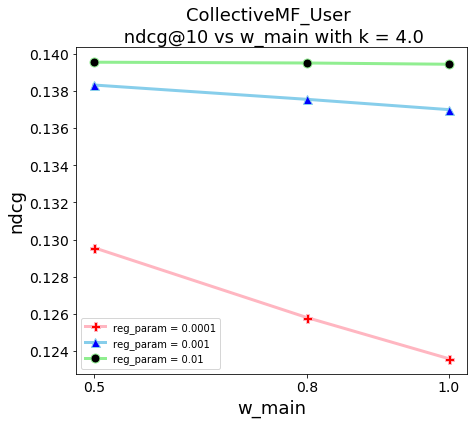

In [596]:
### Visualization of hyperparameters tuning
CollectiveMF_No_ndcg = CollectiveMF_No_ndcg.sort_values('w_main')
fig, ax = plt.subplots(1,1, figsize = (7,6))

for i in range(3):
    labelstring = 'reg_param = '+ str(reg_param[i])
    ax.plot('w_main', 'value', 
            data = CollectiveMF_No_ndcg.loc[(CollectiveMF_No_ndcg['k'] == 4.0)&(CollectiveMF_No_ndcg['reg_param']== reg_param[i])],
            marker= marker[i], markerfacecolor= markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)

ax.legend()
ax.set_ylabel('ndcg',fontsize = 18)
ax.set_xlabel('w_main',fontsize = 18)
ax.set_title('CollectiveMF_User \n ndcg@10 vs w_main with k = 4.0',fontsize = 18)
ax.set_xticks(w_main)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)


In [597]:
plt.savefig('ndcg_vs_w_main_with_k_4.eps', format='eps')

<Figure size 432x288 with 0 Axes>

## CollectiveMF_Both

In [552]:
color = ['lightpink','skyblue','lightgreen']
marker = ['P', '^' ,'o']
reg_param = [0.0001, 0.001, 0.01]
w_main = [0.5,0.8,1]
k = [4.,8.,16.]


In [558]:
CollectiveMF_Both_ndcg = CollectiveMF_Both_set[CollectiveMF_Both_set['metric'] == 'ndcg@10']

In [559]:
CollectiveMF_Both_ndcg = CollectiveMF_Both_ndcg.pivot(index= 'value', 
                                                      columns='params_name', 
                                                      values='params_val').reset_index(inplace = False)

In [560]:
CollectiveMF_Both_ndcg_original = CollectiveMF_Both_ndcg 

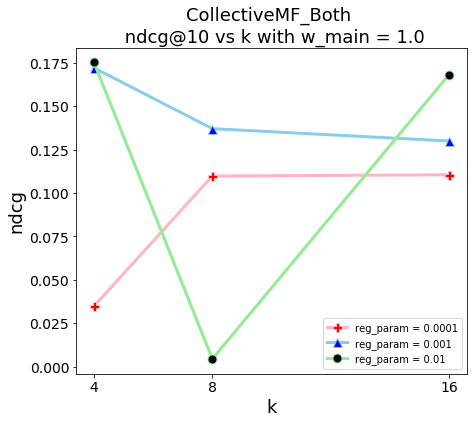

In [566]:
### Visualization of hyperparameters tuning

CollectiveMF_Both_ndcg = CollectiveMF_Both_ndcg_original.sort_values('k')
fig, ax = plt.subplots(1,1, figsize = (7,6))
for i in range(3):
    labelstring = 'reg_param = '+ str(reg_param[i])
    ax.plot('k', 'value', 
            data = CollectiveMF_Both_ndcg.loc[(CollectiveMF_Both_ndcg['w_main'] == 1)&(CollectiveMF_Both_ndcg['reg_param']== reg_param[i])],
            marker= marker[i], markerfacecolor=markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend()
ax.set_ylabel('ndcg',fontsize = 18)
ax.set_xlabel('k',fontsize = 18)
ax.set_title('CollectiveMF_Both \n ndcg@10 vs k with w_main = 1.0',fontsize = 18)
ax.set_xticks(k)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)


In [567]:
plt.savefig('ndcg_vs_k_with_w_main_1.eps', format='eps')

<Figure size 432x288 with 0 Axes>

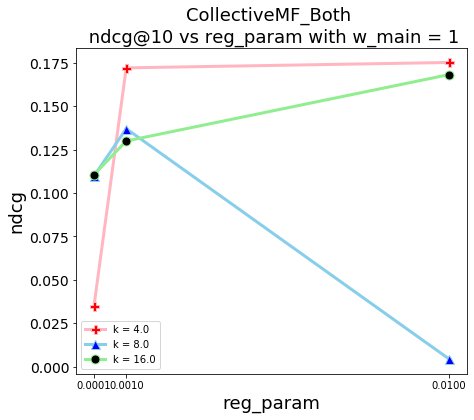

In [568]:
fig, ax = plt.subplots(1,1, figsize = (7,6))
CollectiveMF_Both_ndcg = CollectiveMF_Both_ndcg_original.sort_values('reg_param')
for i in range(3):
    labelstring = 'k = '+ str(k[i])
    ax.plot('reg_param', 'value', 
            data = CollectiveMF_Both_ndcg.loc[(CollectiveMF_Both_ndcg['w_main'] == 1.0)&(CollectiveMF_Both_ndcg['k']== k[i])],
            marker= marker[i], markerfacecolor= markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)

ax.legend()
ax.set_ylabel('ndcg',fontsize = 18)
ax.set_xlabel('reg_param',fontsize = 18)
ax.set_title('CollectiveMF_Both \n ndcg@10 vs reg_param with w_main = 1',fontsize = 18)
ax.set_xticks(reg_param)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=14)


In [569]:
plt.savefig('ndcg_vs_reg_param_with_w_main_1.eps', format='eps')

<Figure size 432x288 with 0 Axes>

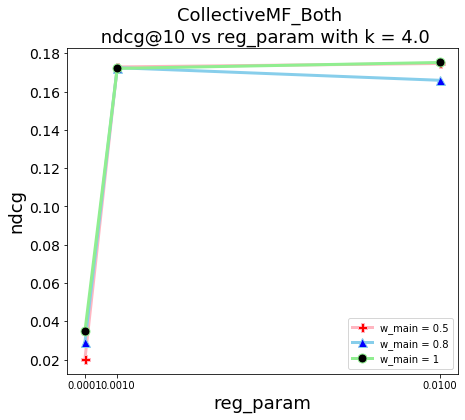

In [570]:
### Visualization of hyperparameters tuning

fig, ax = plt.subplots(1,1, figsize = (7,6))

for i in range(3):
    labelstring = 'w_main = '+ str(w_main[i])
    ax.plot('reg_param', 'value', 
            data = CollectiveMF_Both_ndcg.loc[(CollectiveMF_Both_ndcg['k'] == 4.0)&(CollectiveMF_Both_ndcg['w_main']== w_main[i])],
            marker= marker[i], markerfacecolor= markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)

ax.legend()
ax.set_ylabel('ndcg',fontsize = 18)
ax.set_xlabel('reg_param',fontsize = 18)
ax.set_title('CollectiveMF_Both \n ndcg@10 vs reg_param with k = 4.0',fontsize = 18)
ax.set_xticks(reg_param)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=14)


In [571]:
plt.savefig('ndcg_vs_reg_param_with_k_4.eps', format='eps')


<Figure size 432x288 with 0 Axes>

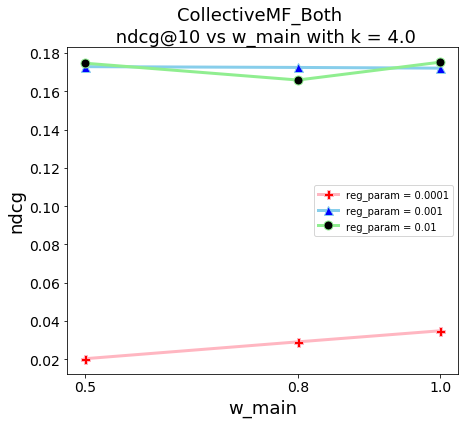

In [572]:
fig, ax = plt.subplots(1,1, figsize = (7,6))
CollectiveMF_Both_ndcg = CollectiveMF_Both_ndcg_original.sort_values('w_main')
for i in range(3):
    labelstring = 'reg_param = '+ str(reg_param[i])
    ax.plot('w_main', 'value', 
            data = CollectiveMF_Both_ndcg.loc[(CollectiveMF_Both_ndcg['k'] == 4.0)&(CollectiveMF_Both_ndcg['reg_param']== reg_param[i])],
            marker= marker[i], markerfacecolor= markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)

ax.legend()
ax.set_ylabel('ndcg',fontsize = 18)
ax.set_xlabel('w_main',fontsize = 18)
ax.set_title('CollectiveMF_Both \n ndcg@10 vs w_main with k = 4.0',fontsize = 18)
ax.set_xticks(w_main)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)


In [573]:
plt.savefig('ndcg_vs_w_main_with_k_4.eps', format='eps')


<Figure size 432x288 with 0 Axes>

## CollectiveMF_User

In [509]:
CollectiveMF_User_ndcg = CollectiveMF_User_set[CollectiveMF_User_set['metric'] == 'ndcg@10']

In [510]:
CollectiveMF_User_ndcg = CollectiveMF_User_ndcg.pivot(index= 'value', 
                                                      columns='params_name', 
                                                      values='params_val').reset_index(inplace = False)

In [494]:
CollectiveMF_User_ndcg.k.unique()

array([ 4.,  8., 16.])

In [495]:
color = ['lightpink','skyblue','lightgreen']
marker = ['P', '^' ,'o']
reg_param = [0.0001, 0.001 , 0.01]
w_main = [0.5,0.8,1]
k = [4.,8.,16.]


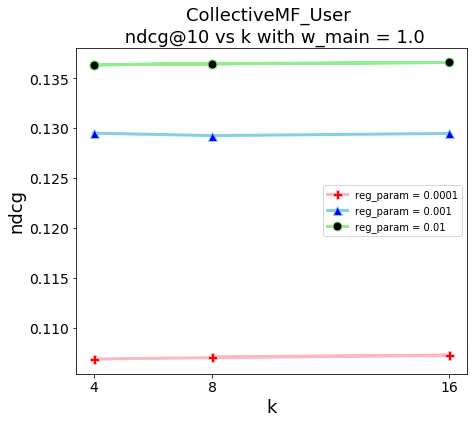

In [582]:
### Visualization of hyperparameters tuning
CollectiveMF_User_ndcg = CollectiveMF_User_ndcg.sort_values('reg_param')
fig, ax = plt.subplots(1,1, figsize = (7,6))
for i in range(3):
    labelstring = 'reg_param = '+ str(reg_param[i])
    ax.plot('k', 'value', 
            data = CollectiveMF_User_ndcg.loc[(CollectiveMF_User_ndcg['w_main'] == 1)&(CollectiveMF_User_ndcg['reg_param']== reg_param[i])],
            marker= marker[i], markerfacecolor=markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend()
ax.set_ylabel('ndcg',fontsize = 18)
ax.set_xlabel('k',fontsize = 18)
ax.set_title('CollectiveMF_User \n ndcg@10 vs k with w_main = 1.0',fontsize = 18)
ax.set_xticks(k)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)



In [583]:
plt.savefig('ndcg_vs_k_with_w_main_1.eps', format='eps')

<Figure size 432x288 with 0 Axes>

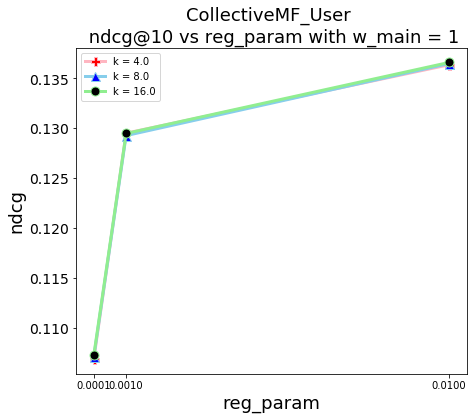

In [537]:
### Visualization of hyperparameters tuning

fig, ax = plt.subplots(1,1, figsize = (7,6))

for i in range(3):
    labelstring = 'k = '+ str(k[i])
    ax.plot('reg_param', 'value', 
            data = CollectiveMF_User_ndcg.loc[(CollectiveMF_User_ndcg['w_main'] == 1.0)&(CollectiveMF_User_ndcg['k']== k[i])],
            marker= marker[i], markerfacecolor= markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)

ax.legend()
ax.set_ylabel('ndcg',fontsize = 18)
ax.set_xlabel('reg_param',fontsize = 18)
ax.set_title('CollectiveMF_User \n ndcg@10 vs reg_param with w_main = 1',fontsize = 18)
ax.set_xticks(reg_param)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=14)


In [538]:
plt.savefig('ndcg_vs_reg_param_with_w_main_1.eps', format='eps')

<Figure size 432x288 with 0 Axes>

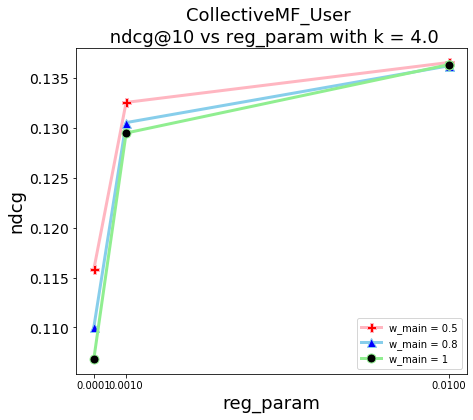

In [539]:
### Visualization of hyperparameters tuning

fig, ax = plt.subplots(1,1, figsize = (7,6))

for i in range(3):
    labelstring = 'w_main = '+ str(w_main[i])
    ax.plot('reg_param', 'value', 
            data = CollectiveMF_User_ndcg.loc[(CollectiveMF_User_ndcg['k'] == 4.0)&(CollectiveMF_User_ndcg['w_main']== w_main[i])],
            marker= marker[i], markerfacecolor= markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)

ax.legend()
ax.set_ylabel('ndcg',fontsize = 18)
ax.set_xlabel('reg_param',fontsize = 18)
ax.set_title('CollectiveMF_User \n ndcg@10 vs reg_param with k = 4.0',fontsize = 18)
ax.set_xticks(reg_param)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=14)


In [540]:
plt.savefig('ndcg_vs_reg_param_with_k_4.eps', format='eps')

<Figure size 432x288 with 0 Axes>

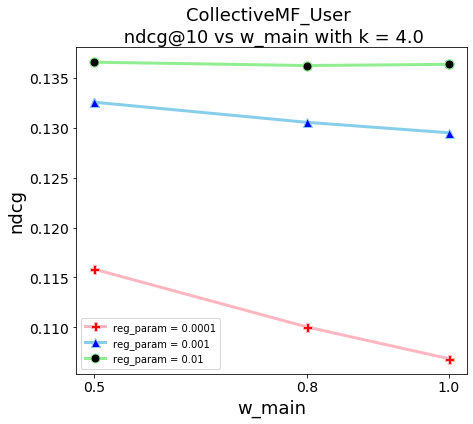

In [580]:
### Visualization of hyperparameters tuning

CollectiveMF_User_ndcg = CollectiveMF_User_ndcg.sort_values('w_main')
fig, ax = plt.subplots(1,1, figsize = (7,6))

for i in range(3):
    labelstring = 'reg_param = '+ str(reg_param[i])
    ax.plot('w_main', 'value', 
            data = CollectiveMF_User_ndcg.loc[(CollectiveMF_User_ndcg['k'] == 4.0)&(CollectiveMF_User_ndcg['reg_param']== reg_param[i])],
            marker= marker[i], markerfacecolor= markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)

ax.legend()
ax.set_ylabel('ndcg',fontsize = 18)
ax.set_xlabel('w_main',fontsize = 18)
ax.set_title('CollectiveMF_User \n ndcg@10 vs w_main with k = 4.0',fontsize = 18)
ax.set_xticks(w_main)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)


In [581]:
plt.savefig('ndcg_vs_w_main_with_k_4.eps', format='eps')


<Figure size 432x288 with 0 Axes>

## CollectiveMF_Item

In [468]:
CollectiveMF_Item_ndcg = CollectiveMF_Item_set[CollectiveMF_Item_set['metric'] == 'ndcg@10']
CollectiveMF_Item_percision = CollectiveMF_Item_set[CollectiveMF_Item_set['metric'] == 'precision@10']
CollectiveMF_Item_rmse = CollectiveMF_Item_set[CollectiveMF_Item_set['metric'] == 'rmse']

#### ndcg

In [469]:
CollectiveMF_Item_ndcg = CollectiveMF_Item_ndcg.pivot(index= 'value', 
                                                      columns='params_name', 
                                                      values='params_val').reset_index(inplace = False)

In [513]:
color = ['lightpink','skyblue','lightgreen']
marker = ['P', '^' ,'o']
reg_param = [0.0001, 0.001 , 0.01]
w_main = [0.5,0.8,1]
k = [4.,8.,16.]


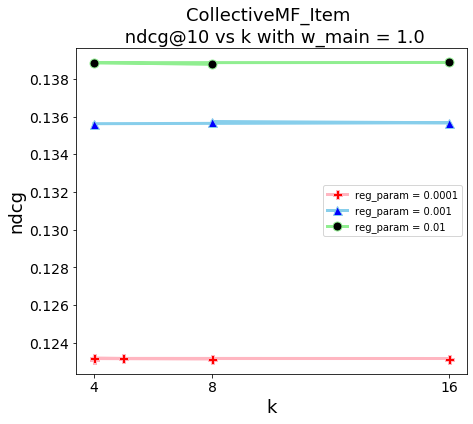

In [514]:
### Visualization of hyperparameters tuning

fig, ax = plt.subplots(1,1, figsize = (7,6))
for i in range(3):
    labelstring = 'reg_param = '+ str(reg_param[i])
    ax.plot('k', 'value', 
            data = CollectiveMF_Item_ndcg.loc[(CollectiveMF_Item_ndcg['w_main'] == 1)&(CollectiveMF_Item_ndcg['reg_param']== reg_param[i])],
            marker= marker[i], markerfacecolor=markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend()
ax.set_ylabel('ndcg',fontsize = 18)
ax.set_xlabel('k',fontsize = 18)
ax.set_title('CollectiveMF_Item \n ndcg@10 vs k with w_main = 1.0',fontsize = 18)
ax.set_xticks(k)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

In [515]:
plt.savefig('ndcg_vs_k_with_w_main_1.eps', format='eps')

<Figure size 432x288 with 0 Axes>

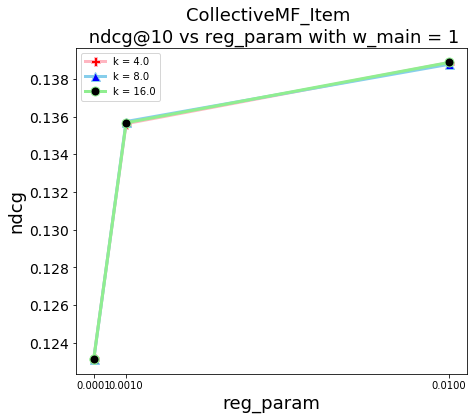

In [516]:
### Visualization of hyperparameters tuning

fig, ax = plt.subplots(1,1, figsize = (7,6))

for i in range(3):
    labelstring = 'k = '+ str(k[i])
    ax.plot('reg_param', 'value', 
            data = CollectiveMF_Item_ndcg.loc[(CollectiveMF_Item_ndcg['w_main'] == 1.0)&(CollectiveMF_Item_ndcg['k']== k[i])],
            marker= marker[i], markerfacecolor= markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)

ax.legend()
ax.set_ylabel('ndcg',fontsize = 18)
ax.set_xlabel('reg_param',fontsize = 18)
ax.set_title('CollectiveMF_Item \n ndcg@10 vs reg_param with w_main = 1',fontsize = 18)
ax.set_xticks(reg_param)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=14)

In [517]:
plt.savefig('ndcg_vs_reg_param_with_w_main_1.eps', format='eps')

<Figure size 432x288 with 0 Axes>

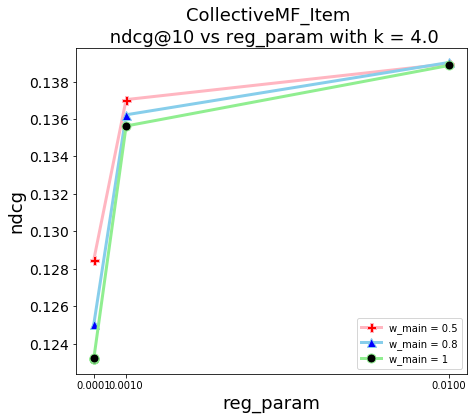

In [518]:
### Visualization of hyperparameters tuning

fig, ax = plt.subplots(1,1, figsize = (7,6))

for i in range(3):
    labelstring = 'w_main = '+ str(w_main[i])
    ax.plot('reg_param', 'value', 
            data = CollectiveMF_Item_ndcg.loc[(CollectiveMF_Item_ndcg['k'] == 4.0)&(CollectiveMF_Item_ndcg['w_main']== w_main[i])],
            marker= marker[i], markerfacecolor= markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)

ax.legend()
ax.set_ylabel('ndcg',fontsize = 18)
ax.set_xlabel('reg_param',fontsize = 18)
ax.set_title('CollectiveMF_Item \n ndcg@10 vs reg_param with k = 4.0',fontsize = 18)
ax.set_xticks(reg_param)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=14)


In [519]:
plt.savefig('ndcg_vs_reg_param_with_k_4.eps', format='eps')

<Figure size 432x288 with 0 Axes>

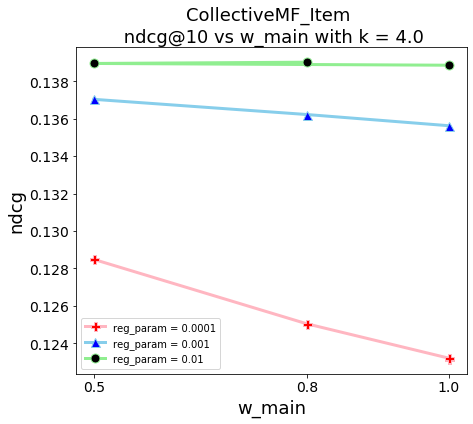

In [520]:
### Visualization of hyperparameters tuning

fig, ax = plt.subplots(1,1, figsize = (7,6))

for i in range(3):
    labelstring = 'reg_param = '+ str(reg_param[i])
    ax.plot('w_main', 'value', 
            data = CollectiveMF_Item_ndcg.loc[(CollectiveMF_Item_ndcg['k'] == 4.0)&(CollectiveMF_Item_ndcg['reg_param']== reg_param[i])],
            marker= marker[i], markerfacecolor= markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)

ax.legend()
ax.set_ylabel('ndcg',fontsize = 18)
ax.set_xlabel('w_main',fontsize = 18)
ax.set_title('CollectiveMF_Item \n ndcg@10 vs w_main with k = 4.0',fontsize = 18)
ax.set_xticks(w_main)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)



In [521]:
plt.savefig('ndcg_vs_w_main_with_k_4.eps', format='eps')

<Figure size 432x288 with 0 Axes>

#### rmse

In [258]:
CollectiveMF_Item_rmse = CollectiveMF_Item_rmse.pivot(index= 'value', 
                                                      columns='params_name', 
                                                      values='params_val').reset_index(inplace = False)

In [449]:
color = ['lightpink','skyblue','lightgreen']
marker = ['P', '^' ,'o']
reg_param = [0.0001, 0.001 , 0.01]
w_main = [0.5,0.8,1]
k = [4.,8.,16.]
markerfacecolor = ['red', 'blue', 'black']

In [294]:
CollectiveMF_Item_rmse = CollectiveMF_Item_rmse.sort_values('reg_param').sort_values('value')
CollectiveMF_Item_rmse = CollectiveMF_Item_rmse.drop(index=[0,2])

In [300]:
CollectiveMF_Item_rmse[CollectiveMF_Item_rmse['w_main'] == 1.0]

params_name,value,k,reg_param,w_main
1,1.424653,4.0,0.0001,1.0
3,1.424668,16.0,0.0001,1.0
4,1.424674,8.0,0.0001,1.0
11,1.479676,4.0,0.0010,1.0
12,1.479698,8.0,0.0010,1.0
13,1.479710,16.0,0.0010,1.0
20,1.493331,8.0,0.0100,1.0
21,1.493336,4.0,0.0100,1.0
22,1.493337,16.0,0.0100,1.0


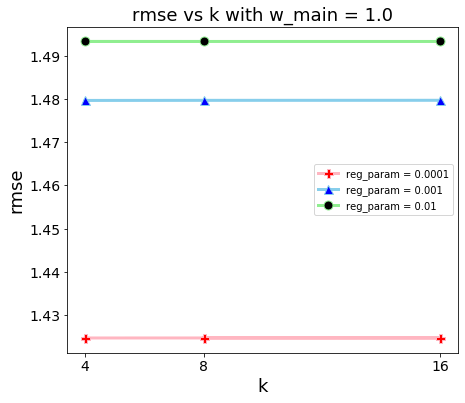

In [453]:
### Visualization of hyperparameters tuning

fig, ax = plt.subplots(1,1, figsize = (7,6))
for i in range(3):
    labelstring = 'reg_param = '+ str(reg_param[i])
    ax.plot('k', 'value', 
            data = CollectiveMF_Item_rmse.loc[(CollectiveMF_Item_rmse['w_main'] == 1)&(CollectiveMF_Item_rmse['reg_param']== reg_param[i])],
            marker= marker[i], markerfacecolor=markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend()
ax.set_ylabel('rmse',fontsize = 18)
ax.set_xlabel('k',fontsize = 18)
ax.set_title('rmse vs k with w_main = 1.0',fontsize = 18)
ax.set_xticks(k)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

In [454]:
plt.savefig('rmse_vs_k_with_w_main_1.eps', format='eps')

<Figure size 432x288 with 0 Axes>

In [310]:
 CollectiveMF_Item_rmse.loc[(CollectiveMF_Item_rmse['w_main'] == 1.0)&(CollectiveMF_Item_rmse['k']== k[0])]

params_name,value,k,reg_param,w_main
1,1.424653,4.0,0.0001,1.0
11,1.479676,4.0,0.0010,1.0
21,1.493336,4.0,0.0100,1.0


In [311]:
 CollectiveMF_Item_rmse.loc[(CollectiveMF_Item_rmse['w_main'] == 1.0)&(CollectiveMF_Item_rmse['k']== k[1])]

params_name,value,k,reg_param,w_main
4,1.424674,8.0,0.0001,1.0
12,1.479698,8.0,0.0010,1.0
20,1.493331,8.0,0.0100,1.0


In [312]:
 CollectiveMF_Item_rmse.loc[(CollectiveMF_Item_rmse['w_main'] == 1.0)&(CollectiveMF_Item_rmse['k']== k[2])]

params_name,value,k,reg_param,w_main
3,1.424668,16.0,0.0001,1.0
13,1.479710,16.0,0.0010,1.0
22,1.493337,16.0,0.0100,1.0


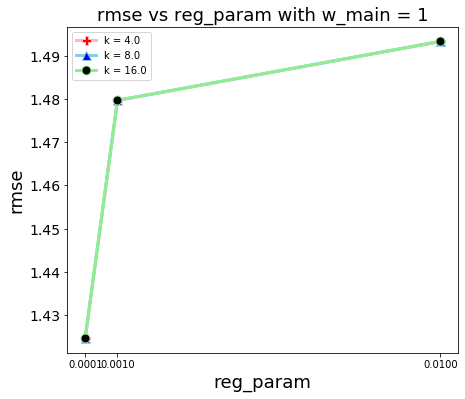

In [455]:
### Visualization of hyperparameters tuning

fig, ax = plt.subplots(1,1, figsize = (7,6))

for i in range(3):
    labelstring = 'k = '+ str(k[i])
    ax.plot('reg_param', 'value', 
            data = CollectiveMF_Item_rmse.loc[(CollectiveMF_Item_rmse['w_main'] == 1.0)&(CollectiveMF_Item_rmse['k']== k[i])],
            marker= marker[i], markerfacecolor= markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)

ax.legend()
ax.set_ylabel('rmse',fontsize = 18)
ax.set_xlabel('reg_param',fontsize = 18)
ax.set_title('rmse vs reg_param with w_main = 1',fontsize = 18)
ax.set_xticks(reg_param)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=14)

In [456]:
plt.savefig('rmse_vs_reg_param_with_w_main_1.eps', format='eps')

<Figure size 432x288 with 0 Axes>

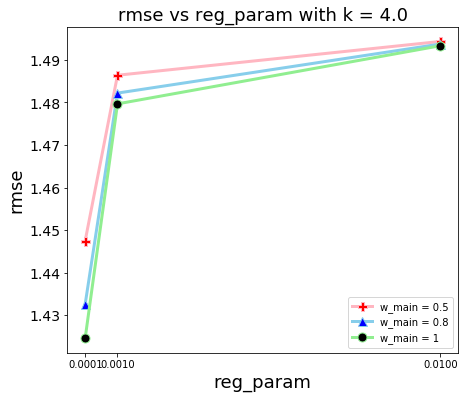

In [457]:
### Visualization of hyperparameters tuning

fig, ax = plt.subplots(1,1, figsize = (7,6))

for i in range(3):
    labelstring = 'w_main = '+ str(w_main[i])
    ax.plot('reg_param', 'value', 
            data = CollectiveMF_Item_rmse.loc[(CollectiveMF_Item_rmse['k'] == 4.0)&(CollectiveMF_Item_rmse['w_main']== w_main[i])],
            marker= marker[i], markerfacecolor= markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)

ax.legend()
ax.set_ylabel('rmse',fontsize = 18)
ax.set_xlabel('reg_param',fontsize = 18)
ax.set_title('rmse vs reg_param with k = 4.0',fontsize = 18)
ax.set_xticks(reg_param)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=14)

In [458]:
plt.savefig('rmse_vs_reg_param_with_k_4.eps', format='eps')

<Figure size 432x288 with 0 Axes>

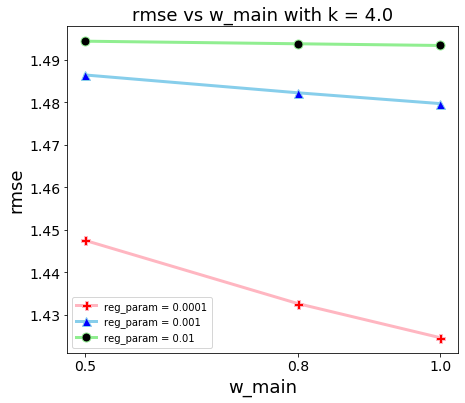

In [459]:
### Visualization of hyperparameters tuning

fig, ax = plt.subplots(1,1, figsize = (7,6))

for i in range(3):
    labelstring = 'reg_param = '+ str(reg_param[i])
    ax.plot('w_main', 'value', 
            data = CollectiveMF_Item_rmse.loc[(CollectiveMF_Item_rmse['k'] == .0)&(CollectiveMF_Item_rmse['reg_param']== reg_param[i])],
            marker= marker[i], markerfacecolor= markerfacecolor[i], markersize=9,
            color= color[i], linewidth=3, label = labelstring)

ax.legend()
ax.set_ylabel('rmse',fontsize = 18)
ax.set_xlabel('w_main',fontsize = 18)
ax.set_title('rmse vs w_main with k = 4.0',fontsize = 18)
ax.set_xticks(w_main)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)



In [460]:
plt.savefig('rmse_vs_w_main_with_k_4.eps', format='eps')

<Figure size 432x288 with 0 Axes>

### New server

In [68]:
new_split = split_params(new)[['model','metric','value','params_name','params_val']]

In [70]:
new_split.model.unique()

array(['FMItem', 'Test_implicit', 'FMNone'], dtype=object)

In [72]:
Test_implicit_set = new_split[new_split['model'] == 'Test_implicit']
FMItem_set = new_split[new_split['model'] == 'FMItem']
FMNone_set = new_split[new_split['model'] == 'FMNone']

## Test_implicit

In [348]:
Test_implicit_set_ndcg = Test_implicit_set[Test_implicit_set['metric'] == 'ndcg@10']
Test_implicit_set_percision = Test_implicit_set[Test_implicit_set['metric'] == 'precision@10']
Test_implicit_set_rmse = Test_implicit_set[Test_implicit_set['metric'] == 'rmse']

In [96]:
Test_implicit_set_ndcg = Test_implicit_set_ndcg.pivot(index="value", 
                                                      columns='params_name', 
                                                      values='params_val').reset_index(inplace = False)

In [323]:
Test_implicit_set_ndcg_original = Test_implicit_set_ndcg

In [412]:
color = ['lightgrey','blue','lightgreen']
marker = ['P', '^' ,'o']
factors = [4,8,16]
regularization = [0.001,0.005, 0.01 ]
learning_rate = [0.0001, 0.001, 0.005]


#### rmse

In [350]:
Test_implicit_set_rmse = Test_implicit_set_rmse.drop_duplicates()

In [351]:
Test_implicit_set_rmse = Test_implicit_set_rmse.pivot(index="value", 
                                                      columns='params_name', values='params_val').reset_index(inplace = False)

In [352]:
Test_implicit_set_rmse_original = Test_implicit_set_rmse

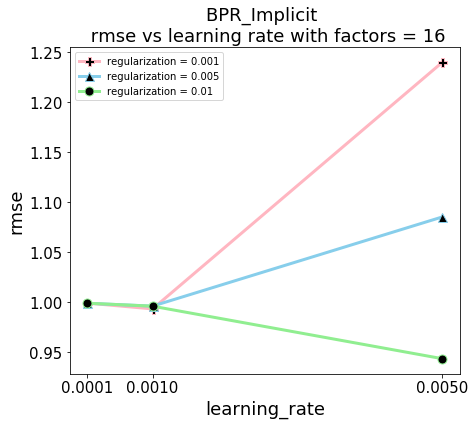

In [522]:
### Visualization of hyperparameters tuning
Test_implicit_set_rmse = Test_implicit_set_rmse_original.sort_values('learning_rate')
fig, ax = plt.subplots(1,1, figsize = (7,6))
for i in range(3):
    labelstring = 'regularization = '+ str(regularization[i])
    ax.plot('learning_rate', 'value', 
        data = Test_implicit_set_rmse.loc[(Test_implicit_set_rmse['factors'] == 16)&(Test_implicit_set_rmse['regularization']== regularization[i])],
            marker= marker[i], markerfacecolor='black', markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend()
ax.set_ylabel('rmse',fontsize=18)
ax.set_xlabel('learning_rate',fontsize=18)
ax.set_title('Test_Implicit \n rmse vs learning rate with factors = 16',fontsize = 18)
ax.set_xticks(learning_rate)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

In [420]:
plt.savefig('rmse_vs_learning_rate_with_factors_16.eps', format='eps')

<Figure size 432x288 with 0 Axes>

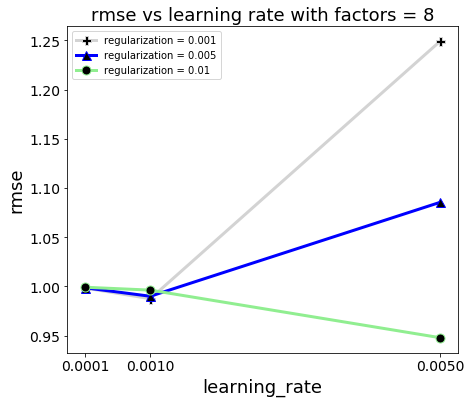

In [421]:
fig, ax = plt.subplots(1,1, figsize = (7,6))
for i in range(3):
    labelstring = 'regularization = '+ str(regularization[i])
    ax.plot('learning_rate', 'value', 
        data = Test_implicit_set_rmse.loc[(Test_implicit_set_rmse['factors'] == 8)&(Test_implicit_set_rmse['regularization']== regularization[i])],
            marker= marker[i], markerfacecolor='black', markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend()
ax.set_ylabel('rmse',fontsize = 18)
ax.set_xlabel('learning_rate',fontsize = 18)
ax.set_title('Test_Implicit \n rmse vs learning rate with factors = 8',fontsize = 18)
ax.set_xticks(learning_rate)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

In [422]:
plt.savefig('rmse_vs_learning_rate_with_factors_8.eps', format='eps')

<Figure size 432x288 with 0 Axes>

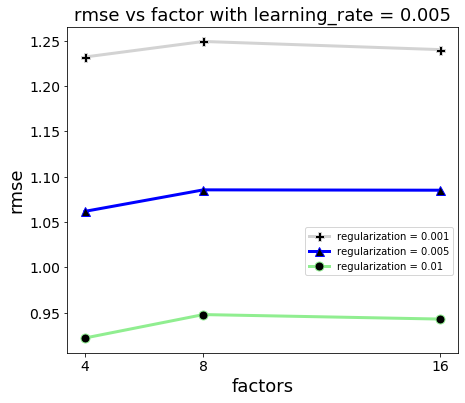

In [423]:
Test_implicit_set_rmse= Test_implicit_set_rmse_original.sort_values('factors')

fig, ax = plt.subplots(1,1, figsize = (7,6))
for i in range(3):
    labelstring = 'regularization = '+ str(regularization[i])
    ax.plot('factors', 'value', 
        data = Test_implicit_set_rmse.loc[(Test_implicit_set_rmse['learning_rate'] == 0.005)&(Test_implicit_set_rmse['regularization']== regularization[i])],
            marker= marker[i], markerfacecolor='black', markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend(bbox_to_anchor=(1,0.4))
ax.set_ylabel('rmse',fontsize = 18)
ax.set_xlabel('factors',fontsize = 18)
ax.set_title('rmse vs factor with learning_rate = 0.005',fontsize = 18)
ax.set_xticks(factors)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

In [424]:
plt.savefig('rmse_vs_factor_with_learning_rate_0.005.eps', format='eps')

<Figure size 432x288 with 0 Axes>

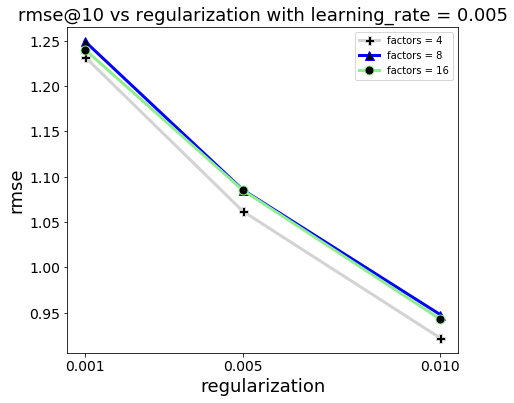

In [425]:
Test_implicit_set_rmse = Test_implicit_set_rmse_original.sort_values('regularization')
fig, ax = plt.subplots(1,1, figsize = (7,6))
for i in range(3):
    labelstring = 'factors = '+ str(factors[i])
    ax.plot('regularization', 'value', 
        data = Test_implicit_set_rmse.loc[(Test_implicit_set_rmse['learning_rate'] == 0.005)&(Test_implicit_set_rmse['factors']== factors[i])],
            marker= marker[i], markerfacecolor='black', markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend() 
ax.set_ylabel('rmse',fontsize = 18)
ax.set_xlabel('regularization',fontsize = 18)
ax.set_title('rmse@10 vs regularization with learning_rate = 0.005',fontsize = 18)
ax.set_xticks(regularization)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

In [426]:
plt.savefig('rmse_vs_regularization_with_learning_rate_0.005.eps', format='eps')

<Figure size 432x288 with 0 Axes>

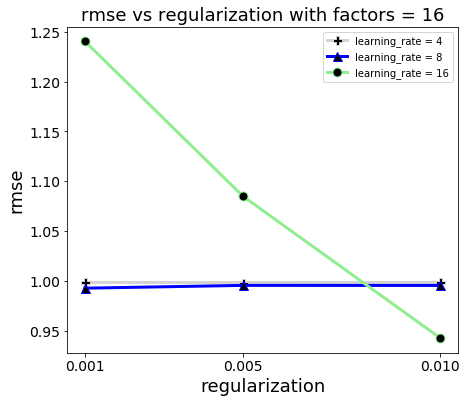

In [427]:
Test_implicit_set_rmse = Test_implicit_set_rmse_original.sort_values('regularization')
fig, ax = plt.subplots(1,1, figsize = (7,6))
for i in range(3):
    labelstring = 'learning_rate = '+ str(factors[i])
    ax.plot('regularization', 'value', 
        data = Test_implicit_set_rmse.loc[(Test_implicit_set_rmse['factors'] == 16)&(Test_implicit_set_rmse['learning_rate']== learning_rate[i])],
            marker= marker[i], markerfacecolor='black', markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend() 
ax.set_ylabel('rmse',fontsize = 18)
ax.set_xlabel('regularization',fontsize = 18)
ax.set_title('rmse vs regularization with factors = 16',fontsize = 18)
ax.set_xticks(regularization)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

In [428]:
plt.savefig('rmse_vs_regularization_with_factors_16.eps', format='eps')

<Figure size 432x288 with 0 Axes>

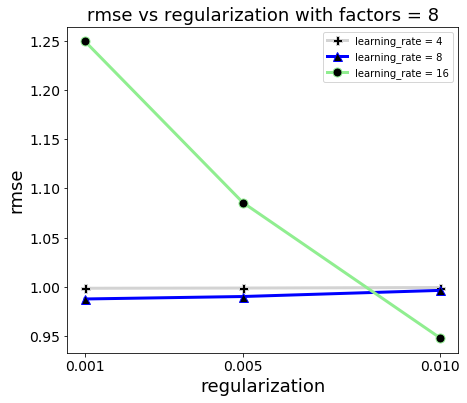

In [429]:
fig, ax = plt.subplots(1,1, figsize = (7,6))
for i in range(3):
    labelstring = 'learning_rate = '+ str(factors[i])
    ax.plot('regularization', 'value', 
        data = Test_implicit_set_rmse.loc[(Test_implicit_set_rmse['factors'] == 8)&(Test_implicit_set_rmse['learning_rate']== learning_rate[i])],
            marker= marker[i], markerfacecolor='black', markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend() 
ax.set_ylabel('rmse',fontsize = 18)
ax.set_xlabel('regularization',fontsize = 18)
ax.set_title('rmse vs regularization with factors = 8',fontsize = 18)
ax.set_xticks(regularization)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)


In [430]:
plt.savefig('rmse_vs_regularization_with_factors_8.eps', format='eps')

<Figure size 432x288 with 0 Axes>

#### ndcg

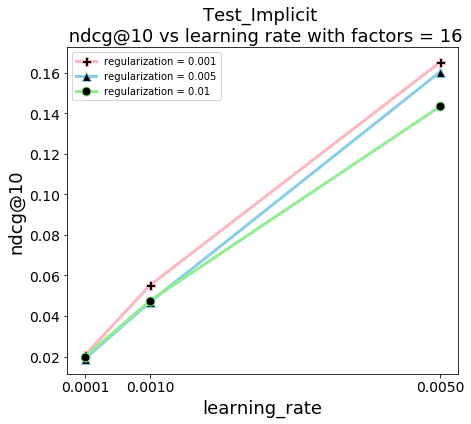

In [523]:
### Visualization of hyperparameters tuning
Test_implicit_set_ndcg = Test_implicit_set_ndcg_original.sort_values('learning_rate')
fig, ax = plt.subplots(1,1, figsize = (7,6))
for i in range(3):
    labelstring = 'regularization = '+ str(regularization[i])
    ax.plot('learning_rate', 'value', 
        data = Test_implicit_set_ndcg.loc[(Test_implicit_set_ndcg['factors'] == 16)&(Test_implicit_set_ndcg['regularization']== regularization[i])],
            marker= marker[i], markerfacecolor='black', markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend()
ax.set_ylabel('ndcg@10',fontsize = 18)
ax.set_xlabel('learning_rate',fontsize = 18)
ax.set_title('Test_Implicit \n ndcg@10 vs learning rate with factors = 16',fontsize = 18)
ax.set_xticks(learning_rate)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

In [524]:
plt.savefig('ndcg_vs_learning_rate_with_factors_16.eps', format='eps')

<Figure size 432x288 with 0 Axes>

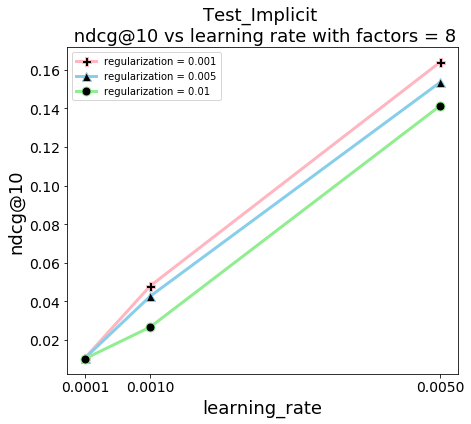

In [525]:
fig, ax = plt.subplots(1,1, figsize = (7,6))
for i in range(3):
    labelstring = 'regularization = '+ str(regularization[i])
    ax.plot('learning_rate', 'value', 
        data = Test_implicit_set_ndcg.loc[(Test_implicit_set_ndcg['factors'] == 8)&(Test_implicit_set_ndcg['regularization']== regularization[i])],
            marker= marker[i], markerfacecolor='black', markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend()
ax.set_ylabel('ndcg@10',fontsize = 18)
ax.set_xlabel('learning_rate',fontsize = 18)
ax.set_title('Test_Implicit \n ndcg@10 vs learning rate with factors = 8',fontsize = 18)
ax.set_xticks(learning_rate)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

In [526]:
plt.savefig('ndcg_vs_learning_rate_with_factors_8.eps', format='eps')

<Figure size 432x288 with 0 Axes>

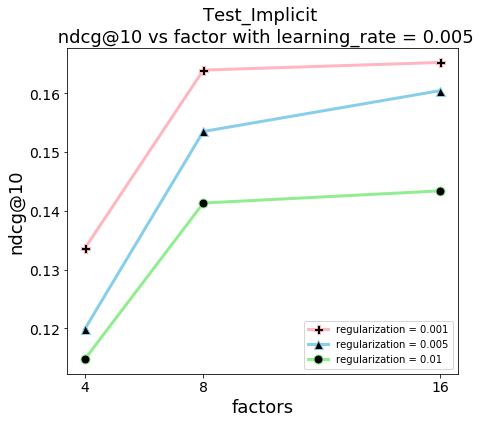

In [527]:
Test_implicit_set_ndcg = Test_implicit_set_ndcg_original.sort_values('factors')

fig, ax = plt.subplots(1,1, figsize = (7,6))
for i in range(3):
    labelstring = 'regularization = '+ str(regularization[i])
    ax.plot('factors', 'value', 
        data = Test_implicit_set_ndcg.loc[(Test_implicit_set_ndcg['learning_rate'] == 0.005)&(Test_implicit_set_ndcg['regularization']== regularization[i])],
            marker= marker[i], markerfacecolor='black', markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend()
ax.set_ylabel('ndcg@10',fontsize = 18)
ax.set_xlabel('factors',fontsize = 18)
ax.set_title('Test_Implicit \n ndcg@10 vs factor with learning_rate = 0.005',fontsize = 18)
ax.set_xticks(factors)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

In [528]:
plt.savefig('ndcg_vs_factor_with_learning_rate_0.005.eps', format='eps')

<Figure size 432x288 with 0 Axes>

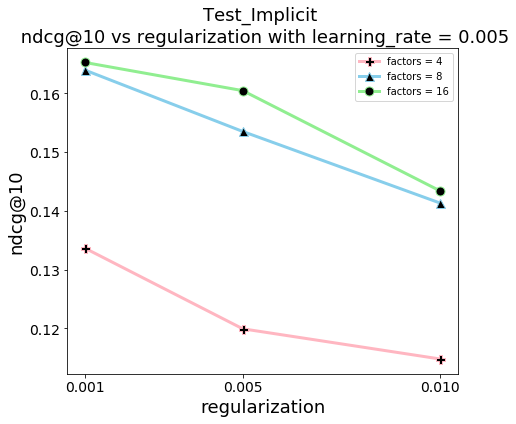

In [529]:
Test_implicit_set_ndcg = Test_implicit_set_ndcg_original.sort_values('regularization')
fig, ax = plt.subplots(1,1, figsize = (7,6))
for i in range(3):
    labelstring = 'factors = '+ str(factors[i])
    ax.plot('regularization', 'value', 
        data = Test_implicit_set_ndcg.loc[(Test_implicit_set_ndcg['learning_rate'] == 0.005)&(Test_implicit_set_ndcg['factors']== factors[i])],
            marker= marker[i], markerfacecolor='black', markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend() 
ax.set_ylabel('ndcg@10',fontsize = 18)
ax.set_xlabel('regularization',fontsize = 18)
ax.set_title('Test_Implicit \n ndcg@10 vs regularization with learning_rate = 0.005',fontsize = 18)
ax.set_xticks(regularization)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

In [530]:
plt.savefig('ndcg_vs_regularization_with_learning_rate_0.005.eps', format='eps')

<Figure size 432x288 with 0 Axes>

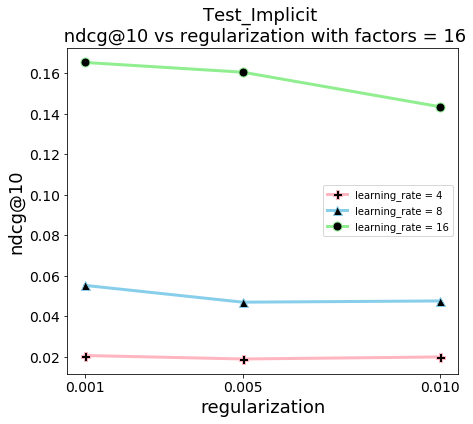

In [531]:
Test_implicit_set_ndcg = Test_implicit_set_ndcg_original.sort_values('regularization')
fig, ax = plt.subplots(1,1, figsize = (7,6))
for i in range(3):
    labelstring = 'learning_rate = '+ str(factors[i])
    ax.plot('regularization', 'value', 
        data = Test_implicit_set_ndcg.loc[(Test_implicit_set_ndcg['factors'] == 16)&(Test_implicit_set_ndcg['learning_rate']== learning_rate[i])],
            marker= marker[i], markerfacecolor='black', markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend() 
ax.set_ylabel('ndcg@10',fontsize = 18)
ax.set_xlabel('regularization',fontsize = 18)
ax.set_title('Test_Implicit \n ndcg@10 vs regularization with factors = 16',fontsize = 18)
ax.set_xticks(regularization)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

In [532]:
plt.savefig('ndcg_vs_regularization_with_factors_16.eps', format='eps')

<Figure size 432x288 with 0 Axes>

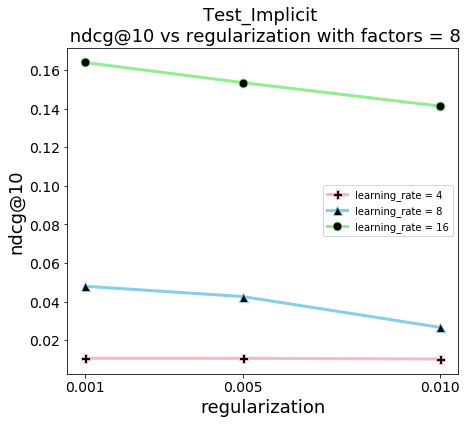

In [533]:
fig, ax = plt.subplots(1,1, figsize = (7,6))
for i in range(3):
    labelstring = 'learning_rate = '+ str(factors[i])
    ax.plot('regularization', 'value', 
        data = Test_implicit_set_ndcg.loc[(Test_implicit_set_ndcg['factors'] == 8)&(Test_implicit_set_ndcg['learning_rate']== learning_rate[i])],
            marker= marker[i], markerfacecolor='black', markersize=9,
            color= color[i], linewidth=3, label = labelstring)
ax.legend() 
ax.set_ylabel('ndcg@10',fontsize = 18)
ax.set_xlabel('regularization',fontsize = 18)
ax.set_title('Test_Implicit \n ndcg@10 vs regularization with factors = 8',fontsize = 18)
ax.set_xticks(regularization)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

In [534]:
plt.savefig('ndcg_vs_regularization_with_factors_8.eps', format='eps',fontsize = 18)

<Figure size 432x288 with 0 Axes>

## FMItem

In [77]:
FMItem_set_ndcg = FMItem_set[FMItem_set['metric'] == 'ndcg@10']
FMItem_set_percision = FMItem_set[FMItem_set['metric'] == 'precision@10']
FMItem_setrmse = FMItem_set[FMItem_set['metric'] == 'rmse']

## FMNone

In [78]:
FMNone_set_ndcg = FMNone_set[FMNone_set['metric'] == 'ndcg@10']
FMNone_set_percision = FMNone_set[FMNone_set['metric'] == 'precision@10']
FMNone_setrmse = FMNone_set[FMNone_set['metric'] == 'rmse']